In [1]:
import os
import networkx as nx 
import seaborn as sns
import json
import matplotlib.pyplot as plt 

%matplotlib inline 

In [7]:
channel_list = os.listdir('C:/Users/Admin/Documents/NET_COVID_projects/NET_COVID_proj2_slackdyn/SlackExtract/slackdynamics_beta_extractFinal/all_channels/channels_c')

In [8]:
files_list = []

for ch in channel_list:
    
    files = os.listdir('C:/Users/Admin/Documents/NET_COVID_projects/NET_COVID_proj2_slackdyn/SlackExtract/slackdynamics_beta_extractFinal/all_channels/channels_c/%s/messages/'%(ch))
    files_list.extend(files)

In [9]:
files_list = sorted(files_list)

In [10]:
TimeStamps = list(map(lambda x: float(x.split('.',2)[0]), files_list)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

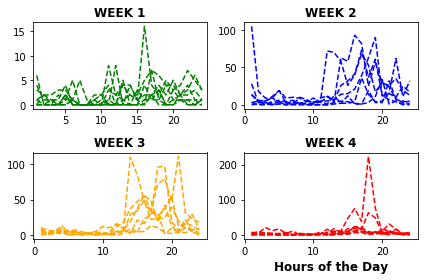

In [49]:
from datetime import datetime as dt

def convert_time(ts):
    time = float(ts)
#     newT = dt.utcfromtimestamp(time).strftime('%Y-%m-%dT%H:%M:%SZ')
    newT = dt.utcfromtimestamp(time)
    return newT

T = sorted(TimeStamps)
T = list(map(lambda x: convert_time(x), T))
# print(T)

########## sorting data by day and within day sorting it by hours ###############

Events = {}
for t in T:
    if t.day in Events:
        Events[t.day][t.hour+1]+=1                  ### beacouse hour count begins from 1    
    else:
        Events[t.day]={}
        for i in range(1,25):                        ### because I want to count hours from 1 
            Events[t.day][i]=0
        Events[t.day][t.hour+1]+=1
        
hrs = list(range(1,25))
days = list(range(min(list(Events.keys())),max(list(Events.keys()))+1))

print(days)
import matplotlib.pyplot as plt
%matplotlib inline

######################## bar plot ###############################################

# fig, axs = plt.subplots(len(days), sharex=True, sharey=True, gridspec_kw={'hspace': 0},figsize=(8,20))
# fig.suptitle('Activity on NET-COVID workspace',fontsize=15,fontweight='bold')

# count = days[0]
# for d in Events:
#     Y = []
#     for j in hrs:
#         Y.append(Events[d][j])
#     axs[d-count].bar(hrs,Y)
#     axs[d-count].set_yscale('log')
#     axs[d-count].set_ylabel('Day %d'%(d-count+1),fontsize=10,fontweight='bold')
#     count

# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()
    
# plt.xlim(0.5,24.7)
# plt.xlabel("Hours of the Day",fontsize=15,fontweight='bold')
# plt.tight_layout()
# plt.savefig('Final_activity.png')
# plt.show()

############################################ line plot #####################################

plt.figure(figsize=(6,4))
count = days[0]
for d in Events:
    Y = []
    for j in hrs:
        Y.append(Events[d][j])
    
    if d-count <=7:
        clr='green'
        plt.subplot(221)
        plt.plot(hrs,Y,'--',color='%s'%(clr))
        plt.title('WEEK 1',fontsize=12,fontweight='bold')
    elif d-count > 7 and d-count <=14 :
        clr='blue'
        plt.subplot(222)
        plt.plot(hrs,Y,'--',color='%s'%(clr))
        plt.title('WEEK 2',fontsize=12,fontweight='bold')
    elif d-count > 14 and d-count <=21 :
        clr='orange'
        plt.subplot(223)
        plt.plot(hrs,Y,'--',color='%s'%(clr))
        plt.title('WEEK 3',fontsize=12,fontweight='bold')
    elif d-count > 21:
        clr='red'
        plt.subplot(224)
        plt.plot(hrs,Y,'--',color='%s'%(clr))
        plt.title('WEEK 4',fontsize=12,fontweight='bold')
        plt.xlabel("Hours of the Day",fontsize=12,fontweight='bold')
            
    

# plt.yscale('log')
plt.xlim(0.5,24.7)

# plt.legend()
plt.tight_layout()
plt.savefig('Final_activity_line.png')
plt.show()

In [13]:
day_act = []
for d in days:
    
    day_act.append(sum(list(Events[d].values())))

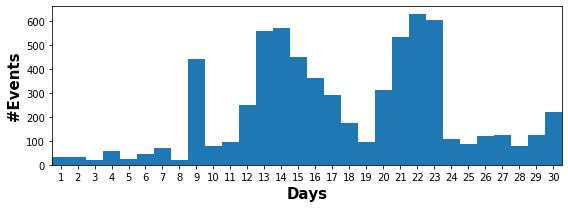

In [52]:
Days = list(map(lambda x: x-days[0]+1, days))
plt.figure(figsize=(8,3))
plt.bar(Days,day_act,width=1)
plt.xlim(0.5,30.5)
plt.xticks(range(1,31))
plt.xlabel('Days', fontdict={'size':15,'weight':'bold'})
plt.ylabel('#Events', fontdict={'size':15,'weight':'bold'})
plt.tight_layout()
plt.savefig('Final_dayWise_activity.png')

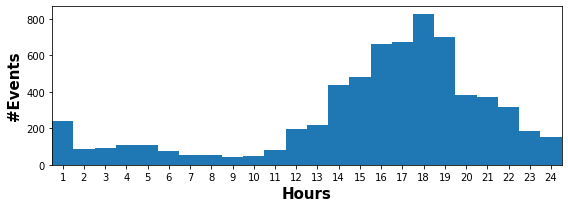

In [53]:
Hourly = []

for h in hrs:
    h_act = 0
    for e in Events:
        h_act+=Events[e][h]
    
    Hourly.append(h_act)
    
plt.figure(figsize=(8,3))
plt.bar(hrs,Hourly,width=1)
plt.xlim(0.5,24.5)
plt.xticks(range(1,25))
plt.xlabel('Hours', fontdict={'size':15,'weight':'bold'})
plt.ylabel('#Events', fontdict={'size':15,'weight':'bold'})
plt.tight_layout()
plt.savefig('final_hourWise_activity.png')

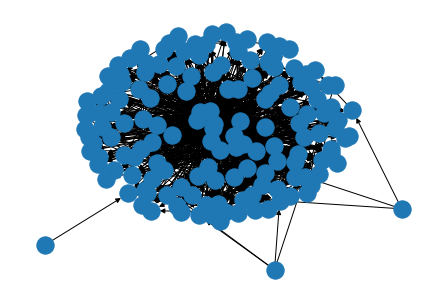

In [50]:
import os
import sys


#################### creating networks for each channel ################################
intro_id = 'C011F9NQ5GE'
modelPitch_id = 'C011C7A3MBR'
dataPitch_id = 'C011TB00SGZ'
boxPitch_id = 'C0123Q8VD96'


G = nx.DiGraph()
Nodes,Edges=[],[]

ch=intro_id
channel_files = os.listdir('C:/Users/Admin/Documents/NET_COVID_projects/NET_COVID_proj2_slackdyn/SlackExtract/slackdynamics_beta_extractFinal/all_channels/channels_c/%s/messages/'%(ch))

for m in channel_files:
#     print(m)
    with open('C:/Users/Admin/Documents/NET_COVID_projects/NET_COVID_proj2_slackdyn/SlackExtract/slackdynamics_beta_extractFinal/all_channels/channels_c/%s/messages/%s'%(ch,m),encoding='utf-16') as json_file:
        msg = json.load(json_file)

#     print(msg)
    user = msg['user']           # one who created the message

    if 'reactions' in msg:

        for r in msg['reactions']:

            actors = list(r['users'].split(' '))           ### we do this because users are stored in a string

            Edges.extend(list(map(lambda x: (x,user), actors)))

    elif 'reply_users' in msg:


        if type(actors) == str:
            actors = list(r['reply_users'].split(' '))   ### we do this because users are stored in a string
        else:
            actors = msg['reply_users']            

        Edges.extend(list(map(lambda x: (x,user), actors)))

G.add_nodes_from(Nodes)            
G.add_edges_from(Edges)           

# nx.write_gexf(G,'%s_channel.gexf'%(ch))
pos = nx.drawing.nx_pydot.graphviz_layout(G)
nx.draw(G,pos)

In [149]:
InDeg = list(dict(G.in_degree()).values())
ODeg = list(dict(G.out_degree()).values())
from collections import defaultdict

def deg_dist(l):
        
    X,Y=[],[]
    d = defaultdict(int)
    for i in l:
        d[i]+=1
    X=list(d.keys())
    X = sorted(X)
    print(X)
    for i in X:
        Y.append(d[i])
    print(Y,sum(Y))
    Y = list(map(lambda x:x/sum(Y),Y))
    return X,Y


[0, 2, 3, 5, 7]
[21, 1, 5, 1, 2] 30
[0, 1, 2, 3]
[4, 18, 6, 2] 30


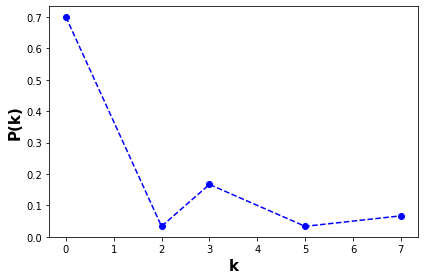

In [150]:
fontdict={'size':15,'weight':'bold'}
Xi,Yi = deg_dist(InDeg)
Xo,Yo = deg_dist(ODeg)
plt.plot(Xi,Yi,'--o',color='blue',label='In degree')
# plt.plot(Xo,Yo,'--s',color='green',label='Out degree')
plt.xlabel('k',fontdict=fontdict)
plt.ylabel('P(k)',fontdict=fontdict)
# plt.yscale('log')
# plt.xscale('log')
plt.tight_layout()
plt.savefig('indeg_%s.png'%(ch))